In [1]:
import numpy as np
from matplotlib import pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

In [11]:
from src.QuantumSimulator import Sine, ShapeFunctions

In [17]:
N=200
mass=5000
L=1
V = lambda x: 20*np.exp(-np.square((x-0.3)/(0.001)))+np.exp(-np.square((x-0.8)/(0.1)))

In [18]:
sine = ShapeFunctions(number_fun=N, length=L, mass=mass)

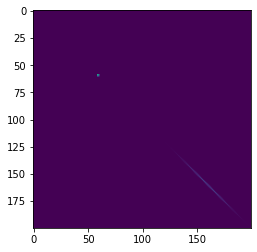

In [19]:
plt.imshow(sine.get_potential_energy(V=V))

In [20]:
U = sine.get_one_parameter_unitary_group(potential=V)

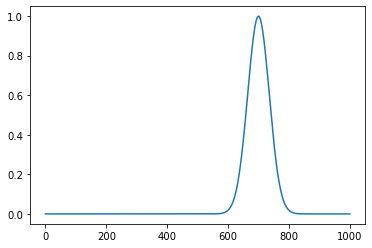

In [21]:
_X = np.linspace(0, L, 1000)
u_0 = sine.get_basis_representation(lambda x: np.exp(-np.square((x-0.7)/(0.05))))
plt.plot(np.vectorize(sine.get_callable_from_base_representation(u_0))(_X))

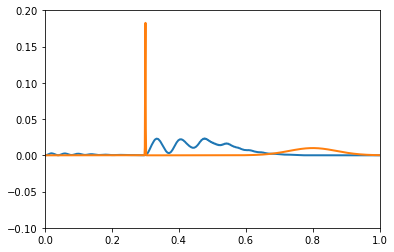

In [22]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 1.0))
ax.set_ylim((-0.1, 0.2))

line, = ax.plot([], [], lw=2)
line_, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame

def init():
    line.set_data([], [])
    return (line,)


def animate(i):
    u = np.matmul(U(i*0.5), u_0)
    p = np.vectorize(sine.get_density_from_base_representation(u))(_X)
    p = p / np.sum(p)
    line.set_data(_X, 5 * p)
    line_.set_data(_X, np.vectorize(V)(_X) / 100)
    return (line, line_,)


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

HTML(anim.to_html5_video())

